In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
import math
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
searches_file = ('searches.tsv')
searches = pd.read_csv(searches_file, sep="\t")
contacts_file = ("contacts.tsv")
contacts = pd.read_csv(contacts_file, sep='\t')

searches_file_v2 = ("searches_v2.tsv")
searches_v2 = pd.read_csv(searches_file_v2, sep='\t')
contacts_file_v2 = ("contacts_v2.tsv")
contacts_v2 = pd.read_csv(contacts_file_v2, sep='\t')

searches_contacts_file = ("searches_contacts_joined.tsv")
searches_contacts = pd.read_csv(searches_contacts_file, sep='\t')

/tmp/ipykernel_77/1924097767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input.dropna(subset=['n_nights'], inplace=True)
/tmp/ipykernel_77/1924097767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input.dropna(subset=['n_guests_max'], inplace=True)


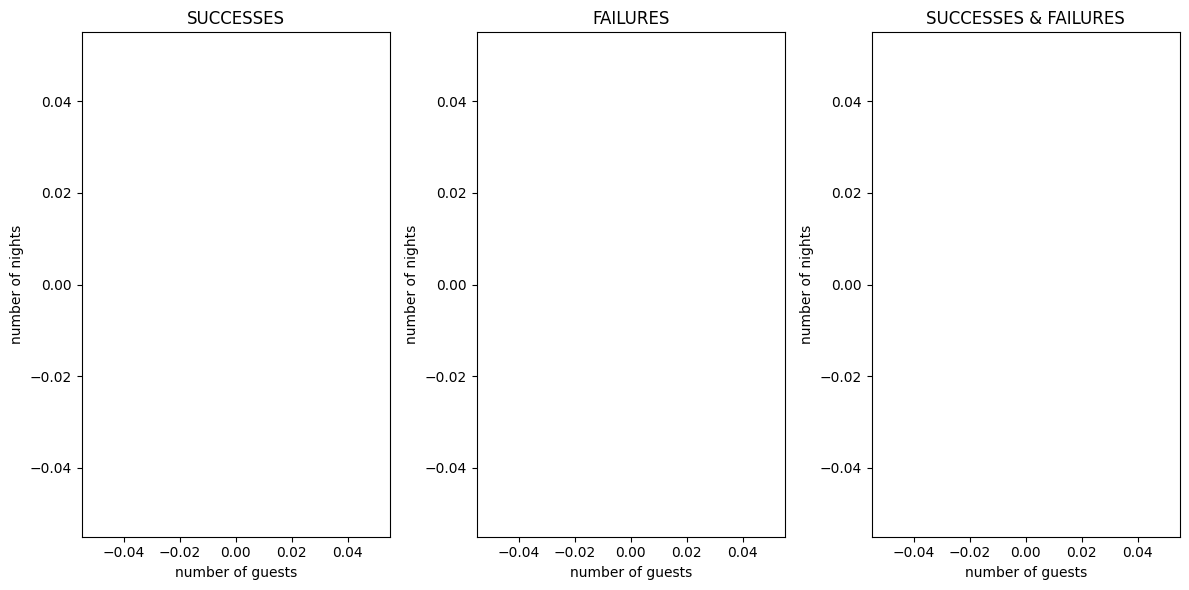

In [93]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'ts_booking_at_dt']]
for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = "No Booking" #0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = "Secured Booking"#1

search_input.dropna(subset=['n_nights'], inplace=True)
search_input.dropna(subset=['n_guests_max'], inplace=True)

no = search_input[search_input['ts_booking_at_dt'] == 0]
yes = search_input[search_input['ts_booking_at_dt'] == 1]

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title('SUCCESSES')
plt.xlabel('number of guests')
plt.ylabel('number of nights')
plt.scatter(yes['n_guests_max'], yes['n_nights'], color = 'green', alpha=0.05)

plt.subplot(1,3,2)
plt.title('FAILURES')
plt.xlabel('number of guests')
plt.ylabel('number of nights')
plt.scatter(no['n_guests_max'], no['n_nights'], color = 'red', alpha=0.05)

plt.subplot(1,3,3)
plt.title('SUCCESSES & FAILURES')
plt.xlabel('number of guests')
plt.ylabel('number of nights')
plt.scatter(no['n_guests_max'], no['n_nights'], color = 'red', alpha=0.05)
plt.scatter(yes['n_guests_max'], yes['n_nights'], color = 'green', alpha=0.05)

plt.tight_layout()


[Text(0.5, 0, 'Max # of Nights'), Text(0, 0.5, 'Booking Status')]

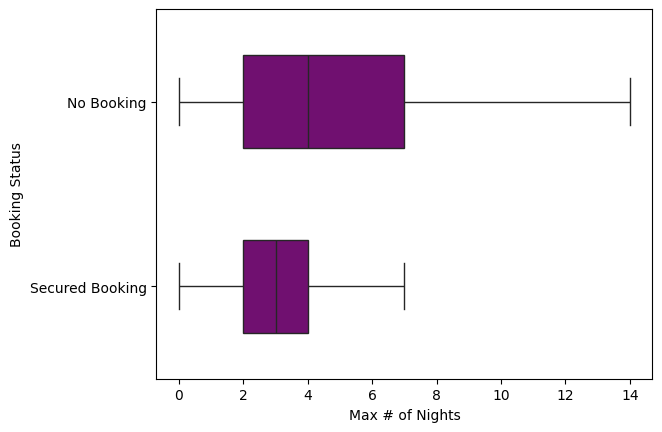

In [99]:
sns.boxplot(data=search_input,x="n_nights",y="ts_booking_at_dt", color = 'purple',width=.5,showfliers=False).set(
    xlabel='Max # of Nights', 
    ylabel='Booking Status'
)

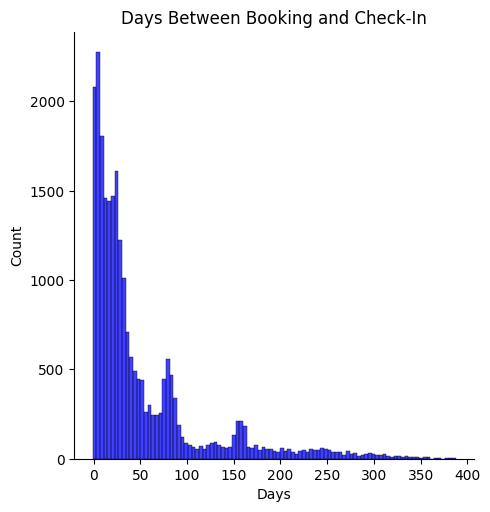

In [4]:
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])
searches['ds'] = pd.to_datetime(searches['ds'])

dates = searches[['ds_checkin', 'ds_checkout', 'ds']].dropna()
dates['duration'] = dates['ds_checkout'] - dates['ds_checkin']
dates['Days'] = dates['ds_checkin'] - dates['ds']

lead_time = dates['Days'] / np.timedelta64(1, 'D')
lead_time = lead_time[lead_time < 400]
sns.displot(x=lead_time, color='blue')
plt.title('Days Between Booking and Check-In')
plt.show()

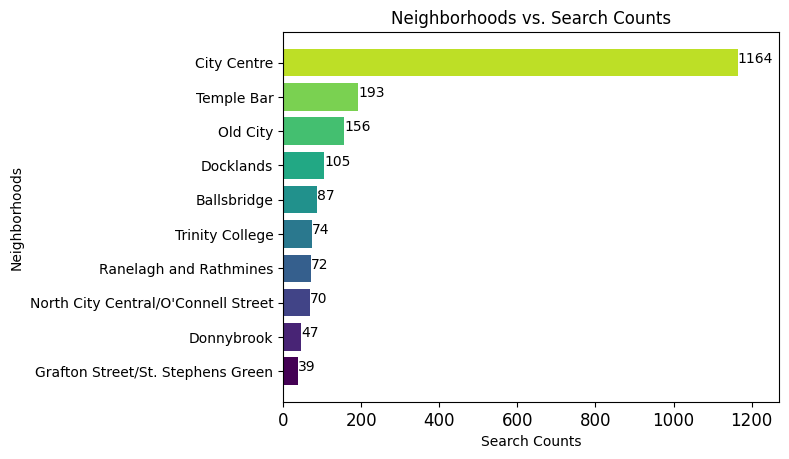

In [123]:
n_count = dict()
neighborhoods = searches[['filter_neighborhoods']].dropna()

for index,row in neighborhoods.iterrows():
    n = row['filter_neighborhoods']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1


n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
location = n_df["Location"].tolist()
count = n_df["Searches"].tolist()

colors = plt.get_cmap('viridis')
amount = len(count)
x = np.arange(amount)

for index, value in enumerate(count):
    plt.text(value, index,
             str(value))

plt.barh(location, count, tick_label=location, color=colors(x / amount))
plt.xticks(fontsize=12)
plt.title("Neighborhoods vs. Search Counts")
plt.xlabel("Search Counts")
plt.ylabel("Neighborhoods")
plt.xlim(0, 1270)
plt.show()

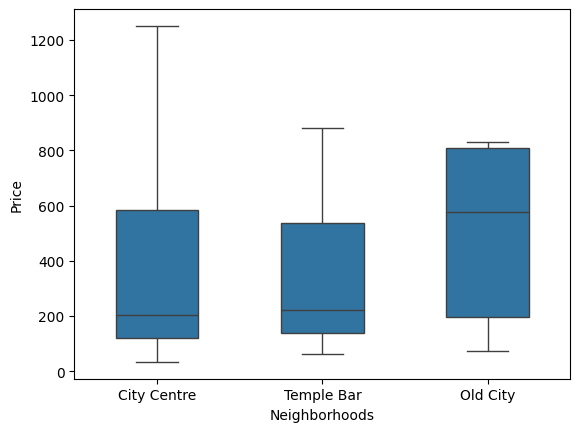

'\n# lowest 3\nn_df_v2_1 = n_df_v2_1[(n_df_v2_1[\'filter_neighborhoods\'] == n_df_low.iloc[0,0]) | \n                 (n_df_v2_1[\'filter_neighborhoods\'] == n_df_low.iloc[1,0]) | \n                 (n_df_v2_1[\'filter_neighborhoods\'] == n_df_low.iloc[2,0])]\n\nn_df_v2_1.reset_index(drop=True, inplace=True)\n\ndisplay(n_df_v2_1)\n\nsns.boxplot(data=n_df_v2_1, x="filter_neighborhoods", y="filter_price_max", width=0.5, showfliers=False)\nplt.xlabel(\'Neighborhoods\')\nplt.ylabel(\'Price\')\nplt.show()\n'

In [188]:
n_count = dict()

n_df = searches[['filter_neighborhoods']].dropna()
n_df_v2 = searches_v2[['filter_neighborhoods', 'filter_price_max']].dropna()
n_df_v2_1 = searches_v2[['filter_neighborhoods', 'filter_price_max']].dropna()

for index,row in neighborhoods.iterrows():
    n = row['filter_neighborhoods']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1


n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df_top10 = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
n_df_high = n_df.nlargest(3,["Searches"]).sort_values(by="Searches")
n_df_low = n_df_top10.nsmallest(3,["Searches"]).sort_values(by="Searches")

n_df_v2 = n_df_v2[(n_df_v2['filter_neighborhoods'] == n_df_high.iloc[0,0]) | 
                 (n_df_v2['filter_neighborhoods'] == n_df_high.iloc[1,0]) | 
                 (n_df_v2['filter_neighborhoods'] == n_df_high.iloc[2,0])]

n_df_v2.reset_index(drop=True, inplace=True)

sns.boxplot(data=n_df_v2, x="filter_neighborhoods", y="filter_price_max", width=0.5, showfliers=False)
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.show()

"""
# lowest 3
n_df_v2_1 = n_df_v2_1[(n_df_v2_1['filter_neighborhoods'] == n_df_low.iloc[0,0]) | 
                 (n_df_v2_1['filter_neighborhoods'] == n_df_low.iloc[1,0]) | 
                 (n_df_v2_1['filter_neighborhoods'] == n_df_low.iloc[2,0])]

n_df_v2_1.reset_index(drop=True, inplace=True)

display(n_df_v2_1)

sns.boxplot(data=n_df_v2_1, x="filter_neighborhoods", y="filter_price_max", width=0.5, showfliers=False)
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.show()
"""

/tmp/ipykernel_77/1985620212.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NULL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  prices.fillna("NULL",inplace=True)
/tmp/ipykernel_77/1985620212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices.fillna("NULL",inplace=True)
/tmp/ipykernel_77/1985620212.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices["Min_Category"] = prices["filter_price_min"].apply(categorize_price)
/tmp/ipyke

<AxesSubplot: xlabel='Min_Category', ylabel='Max_Category'>

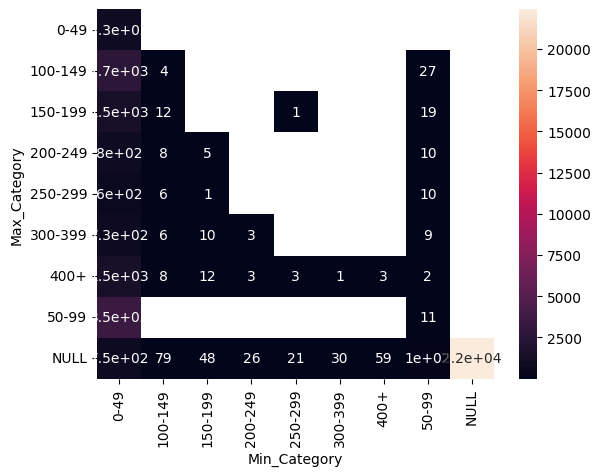

In [6]:
prices = searches_v2[["filter_price_min","filter_price_max"]]
prices.fillna("NULL",inplace=True)
def categorize_price(x):
    if x == "NULL":
        return "NULL"
    elif x >= 1073741823:
        return "NULL"
    elif x < 50:
        return "0-49"
    elif x < 100:
        return "50-99"
    elif x < 150:
        return "100-149"
    elif x < 200:
        return "150-199"
    elif x < 250:
        return "200-249"
    elif x < 300:
        return "250-299"
    elif x < 400:
        return "300-399"
    elif x >= 400:
        return "400+"
prices["Min_Category"] = prices["filter_price_min"].apply(categorize_price)
prices["Max_Category"] = prices["filter_price_max"].apply(categorize_price)
prices["One"] = [1 for _ in prices["Min_Category"]]

sns.heatmap(pd.pivot_table(prices, values='One', index='Max_Category', columns='Min_Category',
                          aggfunc='sum'),annot=True)
# prices.pivot(index='Min_Category', columns='Max_Category',values="One")

In [7]:
prices

filter_price_min filter_price_max Min_Category Max_Category  One
0                  0.0             67.0         0-49        50-99    1
1                  0.0             67.0         0-49        50-99    1
2                 NULL             NULL         NULL         NULL    1
3                 NULL             NULL         NULL         NULL    1
4                 NULL             NULL         NULL         NULL    1
...                ...              ...          ...          ...  ...
35732              0.0            100.0         0-49      100-149    1
35733             NULL             NULL         NULL         NULL    1
35734             NULL             NULL         NULL         NULL    1
35735              0.0            485.0         0-49         400+    1
35736            480.0     1073741823.0         400+         NULL    1

[35737 rows x 5 columns]

<AxesSubplot: title={'center': 'DAY VS. MONTH: # OF CHECK INS'}, xlabel='month', ylabel='day'>

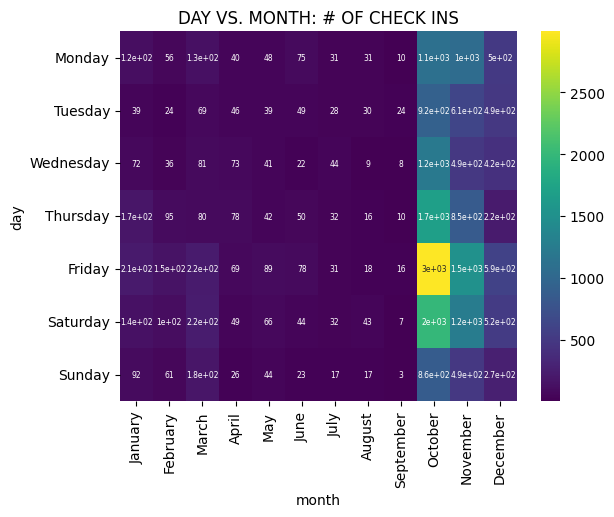

In [8]:
def check_weekday_or_weekend(date):
    given_date = datetime.datetime.strptime(date, '%Y-%m-%d')
    day_of_week = (given_date.weekday() + 1) % 7 

    if day_of_week == 0:
        day_word = 'Sunday'
    elif day_of_week == 1:
        day_word = 'Monday'
    elif day_of_week == 2:
        day_word = 'Tuesday'
    elif day_of_week == 3:
        day_word = 'Wednesday'
    elif day_of_week == 4:
        day_word = 'Thursday'
    elif day_of_week == 5:
        day_word = 'Friday'
    elif day_of_week == 6:
        day_word = 'Saturday'

    return day_word

def check_month(date):
    date = date.split('-')
    month = int(date[1])
    return calendar.month_name[month]


days_dict = dict()

for i in searches_v2['ds_checkin_date'].dropna():
    day = check_weekday_or_weekend(i)
    month = check_month(i)
    if (day,month) in days_dict:
        days_dict[(day,month)] += 1
    else:
        days_dict[(day,month)] = 1

days_data = pd.DataFrame(list(days_dict.items()), columns=['(x, y)', 'count'])
days_data[['day', 'month']] = pd.DataFrame(days_data['(x, y)'].tolist(), index=days_data.index)
days_data.drop('(x, y)', axis=1, inplace=True)

days_data['day'] = pd.Categorical(days_data['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
days_data['month'] = pd.Categorical(days_data['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

plt.title('DAY VS. MONTH: # OF CHECK INS')
grid = days_data.pivot(index='day', columns='month', values='count')
sns.heatmap(grid, annot=True, annot_kws={'size': 5.5}, cmap='viridis')

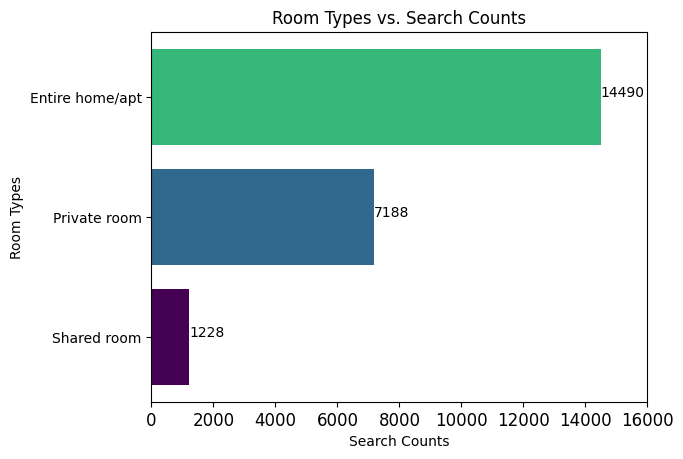

In [9]:
n_count = dict()
rooms = searches[['filter_room_types']].dropna()

for index,row in rooms.iterrows():
    n = row['filter_room_types']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1

n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
location = n_df["Location"].tolist()
count = n_df["Searches"].tolist()

colors = plt.get_cmap('viridis')
amount = len(count)
x = np.arange(amount)

plt.barh(location, count, tick_label=location, color=colors(x / amount))

for index, value in enumerate(count):
    plt.text(value, index,
             str(value))

plt.xticks(fontsize=12)
plt.title("Room Types vs. Search Counts")
plt.xlabel("Search Counts")
plt.ylabel("Room Types")
plt.xlim(0, 16000)
plt.show()


In [10]:
display(searches.describe())

ds                     ds_checkin  \
count                          35737                          23888   
mean   2014-10-07 14:32:34.478551552  2014-11-27 22:42:10.609511168   
min              2014-10-01 00:00:00            2014-10-01 00:00:00   
25%              2014-10-04 00:00:00            2014-10-17 00:00:00   
50%              2014-10-08 00:00:00            2014-11-03 00:00:00   
75%              2014-10-11 00:00:00            2014-12-13 00:00:00   
max              2014-10-14 00:00:00            2016-06-02 00:00:00   
std                              NaN                            NaN   

                         ds_checkout    n_searches      n_nights  \
count                          23888  35737.000000  23888.000000   
mean   2014-12-05 14:50:57.468184832      9.206565      7.672765   
min              2014-10-02 00:00:00      1.000000      0.000000   
25%              2014-10-23 00:00:00      1.000000      2.000000   
50%              2014-11-09 00:00:00      4.000000      3.000000   
75%              2014-12-24 00:00:00     10.000000      5.000000   
max              2016-08-17 00:00:00    448.000000    399.000000   
std                              NaN     17.348746     21.557614   

       n_guests_min  n_guests_max  filter_price_min  filter_price_max  
count  35737.000000  35737.000000      13322.000000      1.332200e+04  
mean       1.742955      2.105857          8.470200      9.019063e+07  
min        1.000000      1.000000          0.000000      9.000000e+00  
25%        1.000000      1.000000          0.000000      8.600000e+01  
50%        1.000000      2.000000          0.000000      1.390000e+02  
75%        2.000000      2.000000          0.000000      3.010000e+02  
max       16.000000     16.000000       1250.000000      1.073742e+09  
std        1.460440      1.817358         53.987679      2.978482e+08

In [11]:
display(searches.skew(axis=0, numeric_only=True, skipna=True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

/tmp/ipykernel_77/702654108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_prices['Price'] = max_prices['filter_price_max']


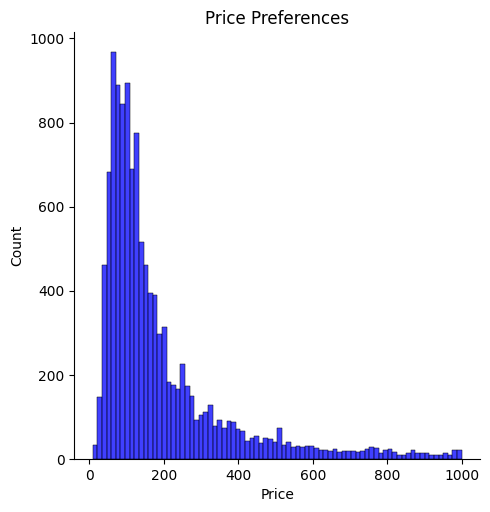

In [12]:
max_prices = searches[searches['filter_price_max'] < 1000]
max_prices['Price'] = max_prices['filter_price_max']
sns.displot(x=max_prices['Price'], color='blue')
plt.title('Price Preferences')
plt.show()

In [13]:
#Convert date columns to datetime data type 
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

#Understand dataset
display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

ts_contact_at                    ts_reply_at  \
count                           7823                           7219   
mean   2014-10-10 11:59:33.640802816  2014-10-10 22:42:36.511982336   
min              2014-03-04 11:08:13            2014-04-18 09:39:06   
25%              2014-10-03 16:28:52            2014-10-03 23:07:32   
50%              2014-10-08 17:34:36            2014-10-09 00:16:21   
75%       2014-10-13 21:28:51.500000     2014-10-14 10:00:04.500000   
max              2015-02-02 08:45:18            2015-02-02 23:18:25   
std                              NaN                            NaN   

                      ts_accepted_at                  ts_booking_at  \
count                           3627                           2174   
mean   2014-10-11 14:07:07.993382912  2014-10-13 07:54:43.307267840   
min              2014-05-21 16:51:54            2014-05-21 16:51:54   
25%              2014-10-04 13:45:13            2014-10-05 13:53:46   
50%              2014-10-09 13:46:50            2014-10-10 11:15:13   
75%       2014-10-14 16:28:27.500000  2014-10-15 13:16:17.249999872   
max              2015-02-03 14:16:42            2015-01-21 16:16:29   
std                              NaN                            NaN   

                          ds_checkin                    ds_checkout  \
count                           7823                           7823   
mean   2014-11-16 09:47:00.452511744  2014-11-22 05:12:33.317141760   
min              2014-10-01 00:00:00            2014-10-02 00:00:00   
25%              2014-10-15 00:00:00            2014-10-19 00:00:00   
50%              2014-10-31 00:00:00            2014-11-06 00:00:00   
75%              2014-11-22 00:00:00            2014-11-30 00:00:00   
max              2015-10-24 00:00:00            2015-12-01 00:00:00   
std                              NaN                            NaN   

          n_guests   n_messages                 length_stay  
count  7823.000000  7823.000000                        7823  
mean      2.422600     6.319954   5 days 19:25:32.864629937  
min       1.000000     1.000000             1 days 00:00:00  
25%       1.000000     2.000000             2 days 00:00:00  
50%       2.000000     4.000000             3 days 00:00:00  
75%       3.000000     8.000000             5 days 00:00:00  
max      16.000000   102.000000           334 days 00:00:00  
std       1.617347     6.472827  14 days 23:45:24.447710564

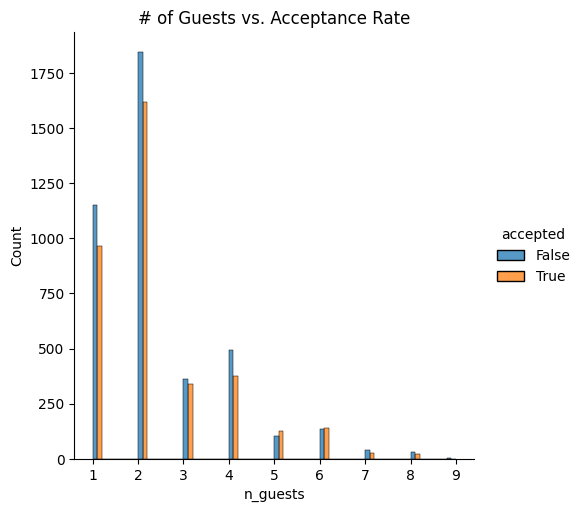

In [14]:
sns.displot(contacts[contacts['n_guests'] < 10], x='n_guests', hue='accepted', multiple='dodge')
plt.title('# of Guests vs. Acceptance Rate')
plt.show()

In [15]:
merged_datasets = contacts.merge(searches_v2, left_on='id_guest', right_on='id_user')

In [16]:
#Classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby(['ds','ds_checkin','classification_max_price'],as_index=False).agg({'accepted': 'mean','id_guest':'count'})

ds ds_checkin classification_max_price  accepted  id_guest
0     2014-10-01 2014-10-01                    0-100  0.500000         2
1     2014-10-01 2014-10-01                  100-200  0.272727        11
2     2014-10-01 2014-10-01                  200-300  0.000000         4
3     2014-10-01 2014-10-01                  500-600  0.000000         4
4     2014-10-01 2014-10-01                     600+  0.260870        23
...          ...        ...                      ...       ...       ...
3473  2014-10-14 2015-07-19                     600+  1.000000         2
3474  2014-10-14 2015-08-01                     600+  0.000000         1
3475  2014-10-14 2015-09-15                     600+  0.333333         6
3476  2014-10-14 2015-09-24                    0-100  0.000000         2
3477  2014-10-14 2015-10-06                     600+  1.000000         2

[3478 rows x 5 columns]

In [17]:
DeepnoteChart(merged_datasets, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}}}""")

In [18]:
merged_datasets

id_guest  \
0      000dfad9-459b-4f0b-8310-3d6ab34e4f57   
1      00197051-c6cb-4c3a-99e9-86615b819874   
2      0027538e-aa9e-4a02-8979-b8397e5d4cba   
3      0027538e-aa9e-4a02-8979-b8397e5d4cba   
4      0027538e-aa9e-4a02-8979-b8397e5d4cba   
...                                     ...   
28531  ffe366f0-6ab6-4e94-818a-c69c125fed3c   
28532  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28533  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28534  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28535  fffea166-9432-43a7-8b1b-09d6f30c1c07   

                                    id_host  \
0      13bb24b8-d432-43a2-9755-5ea11b43bb69   
1      46aa3897-9c00-4d76-ac66-a307593d0675   
2      6bbb88ca-db66-48c5-9c4b-862f7706284a   
3      6bbb88ca-db66-48c5-9c4b-862f7706284a   
4      8772bc85-a9b7-4d85-a52d-41f3620c2912   
...                                     ...   
28531  f86bc9ab-e199-4254-8609-fd67d6aaed42   
28532  6d656267-642e-4972-bdec-a35d82b84ebb   
28533  6d656267-642e-4972-bdec-a35d82b84ebb   
28534  6d656267-642e-4972-bdec-a35d82b84ebb   
28535  6d656267-642e-4972-bdec-a35d82b84ebb   

                                 id_listing       ts_contact_at  \
0      21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370 2014-10-04 16:26:28   
1      fb5ed09a-9848-4f2c-b2ef-34deb62164fb 2014-11-04 09:10:03   
2      d3871da6-8012-4dc4-b508-c91f2c10c297 2014-10-10 12:02:50   
3      d3871da6-8012-4dc4-b508-c91f2c10c297 2014-10-10 12:02:50   
4      0d9b5583-8053-4b67-adfe-8c29eb12efed 2014-10-10 15:23:53   
...                                     ...                 ...   
28531  28caf371-6d1d-4e06-aaf1-e660966ac7a1 2014-10-07 21:30:31   
28532  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28533  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28534  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28535  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   

              ts_reply_at      ts_accepted_at       ts_booking_at ds_checkin  \
0     2014-10-04 16:26:28 2014-10-04 16:26:28 2014-10-04 16:26:28 2014-10-13   
1     2014-11-04 09:45:50 2014-11-04 09:45:50 2014-11-04 12:20:46 2014-11-27   
2     2014-10-10 15:07:01                 NaT                 NaT 2014-10-17   
3     2014-10-10 15:07:01                 NaT                 NaT 2014-10-17   
4                     NaT                 NaT                 NaT 2014-10-17   
...                   ...                 ...                 ...        ...   
28531 2014-10-08 19:04:43                 NaT                 NaT 2014-10-17   
28532 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28533 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28534 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28535 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   

      ds_checkout  n_guests  ...  n_nights  n_guests_min n_guests_max  \
0      2014-10-15         2  ...       2.0             2            2   
1      2014-11-30         1  ...       3.0             1            1   
2      2014-10-19         2  ...       2.0             2            2   
3      2014-10-19         2  ...       2.0             2            2   
4      2014-10-19         2  ...       2.0             2            2   
...           ...       ...  ...       ...           ...          ...   
28531  2014-10-20         2  ...       3.0             2            2   
28532  2014-11-18         2  ...      30.0             1            2   
28533  2014-11-18         2  ...       6.0             2            2   
28534  2014-11-18         2  ...       6.0             2            2   
28535  2014-11-18         2  ...       7.0             2            2   

      origin_country filter_price_min filter_price_max  \
0                 CA              0.0            130.0   
1                 DK              0.0            336.0   
2                 CY              0.0           1258.0   
3                 CY          

In [19]:
merged_datasets

id_guest  \
0      000dfad9-459b-4f0b-8310-3d6ab34e4f57   
1      00197051-c6cb-4c3a-99e9-86615b819874   
2      0027538e-aa9e-4a02-8979-b8397e5d4cba   
3      0027538e-aa9e-4a02-8979-b8397e5d4cba   
4      0027538e-aa9e-4a02-8979-b8397e5d4cba   
...                                     ...   
28531  ffe366f0-6ab6-4e94-818a-c69c125fed3c   
28532  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28533  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28534  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28535  fffea166-9432-43a7-8b1b-09d6f30c1c07   

                                    id_host  \
0      13bb24b8-d432-43a2-9755-5ea11b43bb69   
1      46aa3897-9c00-4d76-ac66-a307593d0675   
2      6bbb88ca-db66-48c5-9c4b-862f7706284a   
3      6bbb88ca-db66-48c5-9c4b-862f7706284a   
4      8772bc85-a9b7-4d85-a52d-41f3620c2912   
...                                     ...   
28531  f86bc9ab-e199-4254-8609-fd67d6aaed42   
28532  6d656267-642e-4972-bdec-a35d82b84ebb   
28533  6d656267-642e-4972-bdec-a35d82b84ebb   
28534  6d656267-642e-4972-bdec-a35d82b84ebb   
28535  6d656267-642e-4972-bdec-a35d82b84ebb   

                                 id_listing       ts_contact_at  \
0      21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370 2014-10-04 16:26:28   
1      fb5ed09a-9848-4f2c-b2ef-34deb62164fb 2014-11-04 09:10:03   
2      d3871da6-8012-4dc4-b508-c91f2c10c297 2014-10-10 12:02:50   
3      d3871da6-8012-4dc4-b508-c91f2c10c297 2014-10-10 12:02:50   
4      0d9b5583-8053-4b67-adfe-8c29eb12efed 2014-10-10 15:23:53   
...                                     ...                 ...   
28531  28caf371-6d1d-4e06-aaf1-e660966ac7a1 2014-10-07 21:30:31   
28532  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28533  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28534  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28535  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   

              ts_reply_at      ts_accepted_at       ts_booking_at ds_checkin  \
0     2014-10-04 16:26:28 2014-10-04 16:26:28 2014-10-04 16:26:28 2014-10-13   
1     2014-11-04 09:45:50 2014-11-04 09:45:50 2014-11-04 12:20:46 2014-11-27   
2     2014-10-10 15:07:01                 NaT                 NaT 2014-10-17   
3     2014-10-10 15:07:01                 NaT                 NaT 2014-10-17   
4                     NaT                 NaT                 NaT 2014-10-17   
...                   ...                 ...                 ...        ...   
28531 2014-10-08 19:04:43                 NaT                 NaT 2014-10-17   
28532 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28533 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28534 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28535 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   

      ds_checkout  n_guests  ...  n_nights  n_guests_min n_guests_max  \
0      2014-10-15         2  ...       2.0             2            2   
1      2014-11-30         1  ...       3.0             1            1   
2      2014-10-19         2  ...       2.0             2            2   
3      2014-10-19         2  ...       2.0             2            2   
4      2014-10-19         2  ...       2.0             2            2   
...           ...       ...  ...       ...           ...          ...   
28531  2014-10-20         2  ...       3.0             2            2   
28532  2014-11-18         2  ...      30.0             1            2   
28533  2014-11-18         2  ...       6.0             2            2   
28534  2014-11-18         2  ...       6.0             2            2   
28535  2014-11-18         2  ...       7.0             2            2   

      origin_country filter_price_min filter_price_max  \
0                 CA              0.0            130.0   
1                 DK              0.0            336.0   
2                 CY              0.0           1258.0   
3                 CY          

In [20]:
#Find the acceptance rate by country
merged_datasets["accepted"]
dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation 
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

origin_country  accepted  count_accepted  count_country  acceptance_rate
73              IN      True             138            874         0.157895
55              HR      True             159            530         0.300000
72              AT      True              83            239         0.347280
54              RU      True              83            239         0.347280
11              IT      True            1183           3137         0.377112
100             AE      True              59            154         0.383117
0               CA      True             407            993         0.409869
13              IE      True            1217           2951         0.412403
24              ES      True             794           1914         0.414838
49              RO      True              50            118         0.423729
78              CR      True              82            188         0.436170
6               GB      True            1610           3667         0.439051
25              BE      True             134            304         0.440789
38              BR      True             215            482         0.446058
27              AU      True             268            590         0.454237
17              FR      True            1526           3232         0.472153
12              CH      True             279            585         0.476923
7               US      True            2050           4298         0.476966
14              DE      True             745           1535         0.485342
31              NL      True             212            433         0.489607
46              SG      True             115            232         0.495690
65              PT      True             101            203         0.497537
1               DK      True              86            125         0.688000

In [21]:
merged_datasets

id_guest  \
0      000dfad9-459b-4f0b-8310-3d6ab34e4f57   
1      00197051-c6cb-4c3a-99e9-86615b819874   
2      0027538e-aa9e-4a02-8979-b8397e5d4cba   
3      0027538e-aa9e-4a02-8979-b8397e5d4cba   
4      0027538e-aa9e-4a02-8979-b8397e5d4cba   
...                                     ...   
28531  ffe366f0-6ab6-4e94-818a-c69c125fed3c   
28532  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28533  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28534  fffea166-9432-43a7-8b1b-09d6f30c1c07   
28535  fffea166-9432-43a7-8b1b-09d6f30c1c07   

                                    id_host  \
0      13bb24b8-d432-43a2-9755-5ea11b43bb69   
1      46aa3897-9c00-4d76-ac66-a307593d0675   
2      6bbb88ca-db66-48c5-9c4b-862f7706284a   
3      6bbb88ca-db66-48c5-9c4b-862f7706284a   
4      8772bc85-a9b7-4d85-a52d-41f3620c2912   
...                                     ...   
28531  f86bc9ab-e199-4254-8609-fd67d6aaed42   
28532  6d656267-642e-4972-bdec-a35d82b84ebb   
28533  6d656267-642e-4972-bdec-a35d82b84ebb   
28534  6d656267-642e-4972-bdec-a35d82b84ebb   
28535  6d656267-642e-4972-bdec-a35d82b84ebb   

                                 id_listing       ts_contact_at  \
0      21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370 2014-10-04 16:26:28   
1      fb5ed09a-9848-4f2c-b2ef-34deb62164fb 2014-11-04 09:10:03   
2      d3871da6-8012-4dc4-b508-c91f2c10c297 2014-10-10 12:02:50   
3      d3871da6-8012-4dc4-b508-c91f2c10c297 2014-10-10 12:02:50   
4      0d9b5583-8053-4b67-adfe-8c29eb12efed 2014-10-10 15:23:53   
...                                     ...                 ...   
28531  28caf371-6d1d-4e06-aaf1-e660966ac7a1 2014-10-07 21:30:31   
28532  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28533  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28534  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   
28535  90dddef6-23ef-4df3-b454-8fd3d0e8cade 2014-10-08 00:05:05   

              ts_reply_at      ts_accepted_at       ts_booking_at ds_checkin  \
0     2014-10-04 16:26:28 2014-10-04 16:26:28 2014-10-04 16:26:28 2014-10-13   
1     2014-11-04 09:45:50 2014-11-04 09:45:50 2014-11-04 12:20:46 2014-11-27   
2     2014-10-10 15:07:01                 NaT                 NaT 2014-10-17   
3     2014-10-10 15:07:01                 NaT                 NaT 2014-10-17   
4                     NaT                 NaT                 NaT 2014-10-17   
...                   ...                 ...                 ...        ...   
28531 2014-10-08 19:04:43                 NaT                 NaT 2014-10-17   
28532 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28533 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28534 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   
28535 2014-10-12 20:58:12                 NaT                 NaT 2014-11-11   

      ds_checkout  n_guests  ...  n_nights  n_guests_min n_guests_max  \
0      2014-10-15         2  ...       2.0             2            2   
1      2014-11-30         1  ...       3.0             1            1   
2      2014-10-19         2  ...       2.0             2            2   
3      2014-10-19         2  ...       2.0             2            2   
4      2014-10-19         2  ...       2.0             2            2   
...           ...       ...  ...       ...           ...          ...   
28531  2014-10-20         2  ...       3.0             2            2   
28532  2014-11-18         2  ...      30.0             1            2   
28533  2014-11-18         2  ...       6.0             2            2   
28534  2014-11-18         2  ...       6.0             2            2   
28535  2014-11-18         2  ...       7.0             2            2   

      origin_country filter_price_min filter_price_max  \
0                 CA              0.0            130.0   
1                 DK              0.0            336.0   
2                 CY              0.0           1258.0   
3                 CY          

In [22]:
import country_converter as coco

countries = searches[['origin_country']]
countries_dict = {}

for index,row in countries.iterrows():
    country = row['origin_country']
    if country in countries_dict:
        countries_dict[country] += 1
    else:
        countries_dict[country] = 1

country_keys = countries_dict.keys()
country_values = countries_dict.values()
heatmap_data = {
    'origin_country': country_keys,
    'Count': country_values
}
countries_df = pd.DataFrame(heatmap_data)

SHAPEFILE = '/work/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
iso3_codes = geo_df['country'].to_list()
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
geo_df['iso2_code'] = iso2_codes_list
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
merged_df = pd.merge(left=geo_df, right=countries_df, how='left', left_on='iso2_code', right_on='origin_country')
merged_df = merged_df.drop(['origin_country'], axis=1)
merged_df['Count'] = merged_df['Count'].fillna(0)
vmin = merged_df['Count'].min()
vmax = merged_df['Count'].max()
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
merged_df.plot(column='Count', ax=ax, edgecolor='0.8', linewidth=1, cmap='Purples')
ax.set_title('Dublin Airbnb Searches by Country', fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Purples')
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

ModuleNotFoundError: No module named 'country_converter'

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


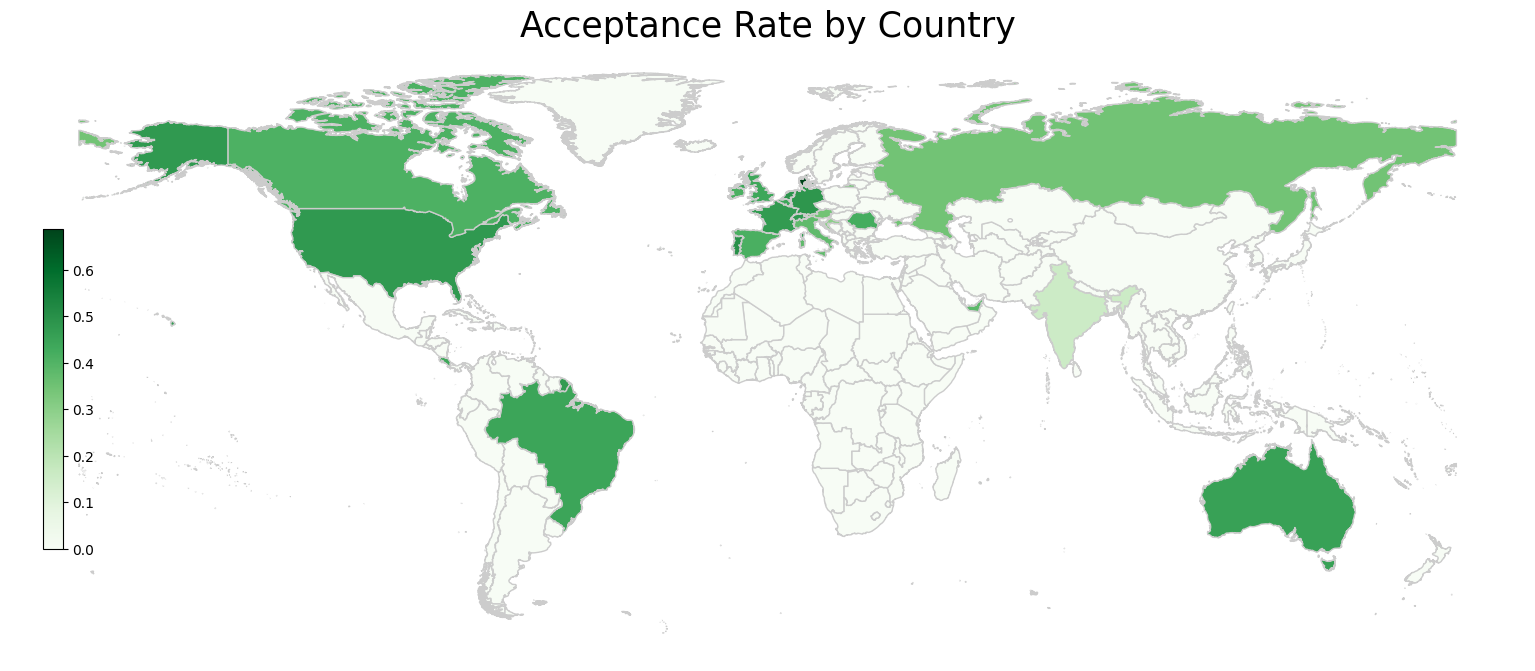

In [ ]:
countries_df = acceptance_country[['origin_country', 'acceptance_rate']]

SHAPEFILE = '/work/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
iso3_codes = geo_df['country'].to_list()
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
geo_df['iso2_code'] = iso2_codes_list
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
merged_df = pd.merge(left=geo_df, right=countries_df, how='left', left_on='iso2_code', right_on='origin_country')
merged_df = merged_df.drop(['origin_country'], axis=1)
merged_df['acceptance_rate'] = merged_df['acceptance_rate'].fillna(0)
vmin = merged_df['acceptance_rate'].min()
vmax = merged_df['acceptance_rate'].max()
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
merged_df.plot(column='acceptance_rate', ax=ax, edgecolor='0.8', linewidth=1, cmap='Greens')
ax.set_title('Acceptance Rate by Country', fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Greens')
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

label_encoder = LabelEncoder()
features = contacts[['id_host', 'id_listing', 'ts_contact_at', 'ds_checkin', 'ds_checkout', 'n_guests', 'n_messages']]
targets = contacts['ts_booking_at'].notnull().astype(int)
features['id_host'] = label_encoder.fit_transform(features['id_host'])
features['id_listing'] = label_encoder.fit_transform(features['id_listing'])

features['ts_contact_at'] = pd.to_datetime(features['ts_contact_at'])
features['ts_contact_at_year'] = features['ts_contact_at'].dt.year
features['ts_contact_at_month'] = features['ts_contact_at'].dt.month
features['ts_contact_at_day'] = features['ts_contact_at'].dt.day
features['ts_contact_at_hour'] = features['ts_contact_at'].dt.hour
features['ts_contact_at_minute'] = features['ts_contact_at'].dt.minute
features['ts_contact_at_day_of_week'] = features['ts_contact_at'].dt.day_of_week
features['ts_contact_at_quarter'] = features['ts_contact_at'].dt.quarter
features.drop(columns=['ts_contact_at'], inplace=True)

features['ds_checkin'] = pd.to_datetime(features['ds_checkin'])
features['ds_checkin_year'] = features['ds_checkin'].dt.year
features['ds_checkin_month'] = features['ds_checkin'].dt.month
features['ds_checkin_day'] = features['ds_checkin'].dt.day
features['ds_checkin_day_of_week'] = features['ds_checkin'].dt.day_of_week
features['ds_checkin_quarter'] = features['ds_checkin'].dt.quarter
features.drop(columns=['ds_checkin'], inplace=True)

features['ds_checkout'] = pd.to_datetime(features['ds_checkout'])
features['ds_checkout_year'] = features['ds_checkout'].dt.year
features['ds_checkout_month'] = features['ds_checkout'].dt.month
features['ds_checkout_day'] = features['ds_checkout'].dt.day
features['ds_checkout_day_of_week'] = features['ds_checkout'].dt.day_of_week
features['ds_checkout_quarter'] = features['ds_checkout'].dt.quarter
features.drop(columns=['ds_checkout'], inplace=True)

X_tr, X_te, y_tr, y_te = train_test_split(features, targets, test_size=0.2, random_state=0)
X_tr.fillna(-1, inplace=True)
X_te.fillna(-1, inplace=True)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.fit_transform(X_te)

model = LogisticRegression()
model.fit(X_tr_scaled, y_tr)

y_pred = model.predict(X_te_scaled)

accuracy = accuracy_score(y_te, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(y_te, y_pred))

TN, FP, FN, TP = confusion_matrix(y_te, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

/tmp/ipykernel_37/1907951276.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['id_host'] = label_encoder.fit_transform(features['id_host'])
/tmp/ipykernel_37/1907951276.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['id_listing'] = label_encoder.fit_transform(features['id_listing'])
/tmp/ipykernel_37/1907951276.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cced6a8-fe40-40d7-b88b-a3eb124108df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>